# Analysing the 'Algerian Forest Fires Dataset Data Set' from the UC Irvine Machine Learning repository

This notebook is used to analyze the 'Algerian Forest Fires Dataset Data Set' from the UC Irvine Machine Learning repository. The data set is available [here](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++). **The objective of the notebook is to create a model to classify the instances into fire or not fire**.

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria. 122 instances for each region. The period od the data colletcion was June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class):


1. Date: (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
2. Temp: temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH: Relative Humidity in %: 21 to 90
4. Ws: Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

The notebook is organized as follows:

1. Data exploration
2. Train ML model
3. Evaluate the ML model
4. Conclusion

----------

## 1. Data exploration

In this section, we import the data set and organize it. The result is a data set with 244 rows and 13 columns ('Temperature', 'RH', 'Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region', 'date')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

----------

### Getting the data

In [2]:
data = pd.read_csv('/Users/leuzinger/Dropbox/Data Science/Awari/Classification/Algerian Forest Fires Dataset Data Set/Algerian_forest_fires_dataset_UPDATE.csv')
data.reset_index(inplace=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,Bejaia Region Dataset
0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [3]:
data.columns=['day','month','year','Temperature','RH','Ws','Rain ','FFMC','DMC','DC','ISI','BUI','FWI','Classes']
data['region'] = 'Bejaia'
data.loc[123:,'region'] = 'Sidi-Bel Abbes'
data = data.drop([0,123,124],axis=0)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 30.5+ KB


In [5]:
#there was an issue with this line. The values of two columns were combined in a single column.

data.loc[168,:] = ['14', '07', '2012', '37', '37', '18', '0.2', '88.9', '12.9',
       '14.6','9', '12.5', '10.4', 'fire', 'Sidi-Bel Abbes']

In [6]:
data['date'] = data[['year','month','day']].agg('-'.join, axis=1)
data = data.drop(['year','month','day'],axis=1)

In [7]:
data[['Temperature', 'RH', 'Ws']] = data[['Temperature', 'RH', 'Ws']].astype(int)
data[['Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = data[['Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 246
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int64         
 1   RH           244 non-null    int64         
 2   Ws           244 non-null    int64         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    object        
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 34.8+ KB


In [8]:
data.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [9]:
data['Classes'] = data['Classes'].str.replace(' ','').str.replace('  ','').str.replace('notfire','not fire')
data['Classes'] = data['Classes'].str.replace('not fire','0').str.replace('fire','1').astype(int)
data.Classes.unique()

array([0, 1])

In [10]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
1,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,Bejaia,2012-06-01
2,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,Bejaia,2012-06-02
3,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,Bejaia,2012-06-03
4,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,Bejaia,2012-06-04
5,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,Bejaia,2012-06-05


----------

### Data statistics and visualization

First, let's have a look at some statistics from the data set. We verifiy that the mean values of the attributes have different scales. Thus, there may be some benefit from standardizing the data [(GÉRON, 2019)](https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646).

Second, we must verify if our data set is balanced. **We can see that the classes are reasonably balanced between fires and not fires**.

"It is often useful to look at your data using multiple different visualizations in order to spark ideas" [(BROWNLEE, 2016)](https://machinelearningmastery.com/machine-learning-with-python/). Looking at the histogram of the atributes, we verify that some have Gaussian-like distributions and other exponential-like distributions.

In [11]:
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [12]:
data.Classes.value_counts()

1    138
0    106
Name: Classes, dtype: int64

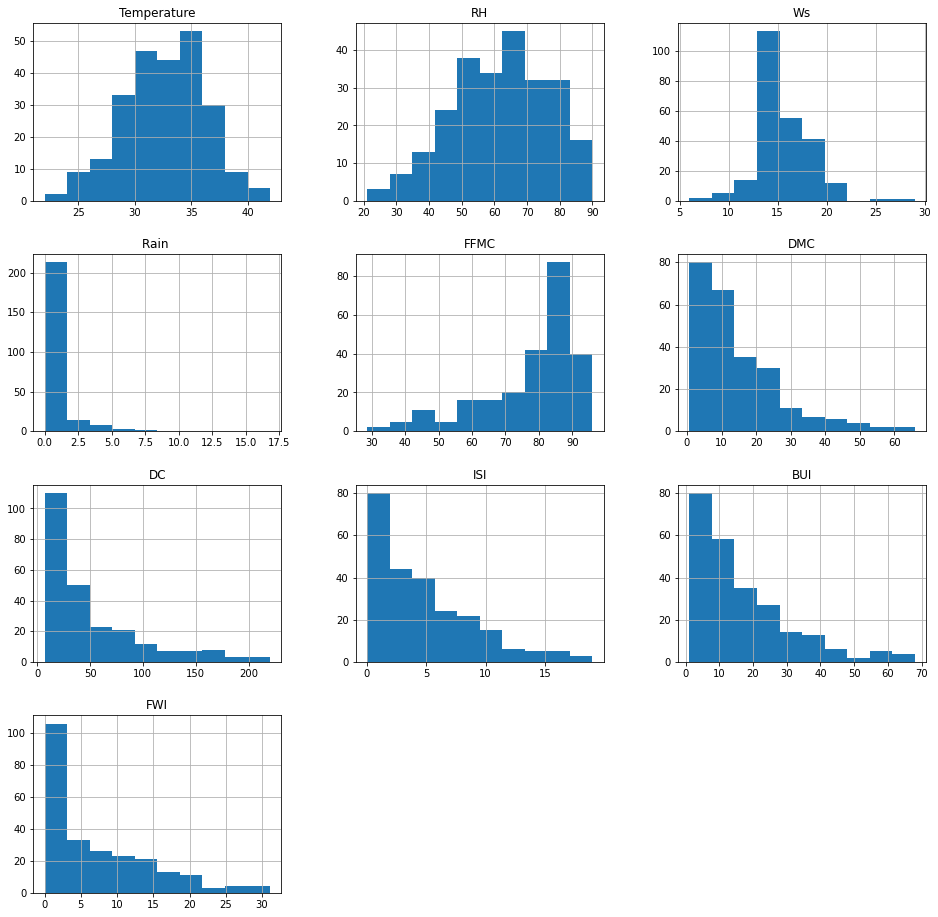

In [13]:
data[['Temperature', 'RH', 'Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']].hist(sharex=False, sharey=False, xlabelsize=10, ylabelsize=10,figsize=(16, 16))
plt.show()

----------

### Creating the Train and Test sets

Creating a test set at the beginning of the project avoid *data snooping* bias, i.e., "when you estimate the generalization error using the test set, your estimate will be too optimistic, and you will launch a system that will not perform as well as expected" (GÉRON, 2019).

Therefore, we create training and testing sets.

In [14]:
from sklearn.model_selection import train_test_split

fire_X = data.drop('Classes',axis=1).copy()
fire_y = data['Classes'].copy()

fire_X_train, fire_X_test, fire_y_train, fire_y_test = train_test_split(fire_X, fire_y, test_size=0.2,stratify=fire_y)

----------

### Preparing the data for ML algorithms

Before creating the ML models, we need to prepare the data so that the ML algorithms will work properly.

First, we need to clean missing values from the dataset. Second, we need to put all the attributes in the same scale because "Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales" (GÉRON, 2019).

We verify that there is no missing values in our data set. So, we just prepare a pipeline to do the scaling when necessary.

Besides, we do not expect the day to have a impact on the fires, but the month of the year can have some impact. Moreover, in this case the week of the year may be even more informative, as the weather conditions may varify during the month. Therefore, we convert the date attribute to week of the year.\

Finally, we encode the region as 0 (Bejaia) and 1 (Sidi-Bel Abbes).

In [15]:
data.isnull().values.any()

False

In [16]:
import warnings
warnings.filterwarnings("ignore")

fire_X_train['date'] = fire_X_train['date'].dt.week
fire_X_train = fire_X_train.rename(columns={'date': 'week'})
fire_X_train['region'] = fire_X_train['region'].str.replace('Bejaia','0').str.replace('Sidi-Bel Abbes','1')
fire_X_train['region'] = fire_X_train['region'].astype(int)
fire_X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,week
122,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0,39
89,34,64,16,0.0,89.4,50.2,210.4,7.3,62.9,19.9,0,35
41,33,76,14,0.0,81.1,8.1,18.7,2.6,8.1,2.2,0,28
193,37,56,11,0.0,87.4,11.2,20.2,5.2,11.0,5.9,1,32
160,35,42,15,0.3,84.7,15.5,45.1,4.3,16.7,6.3,1,27


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def estimator_scaler(estimator):
    #imputer = SimpleImputer(strategy='median')
    pipeline = Pipeline(steps=[('scaler',StandardScaler()),('model', estimator)])
    return pipeline 

----------

## 2. Train ML model

After preparing the data set, we are ready to select and train our ML model.

We start with two linear machine learning algorithms:

1. Logistic Regression (LogR). "Logistic regression assumes a Gaussian distribution for the numeric input variables and can model binary classification problem" (BROWNLEE, 2016). "It is commonly used to estimate the probability that an instance belongs to a particular class" (GÉRON, 2019).
2. Linear Discriminant Analysis (LDA). This is a statistical technique for binary and multiclass classification (BROWNLEE, 2016).

Then, we try some nonlinear machine learning algorithms:


3. k-Nearest Neighbors (KNN). This model "locates the k most similar instances in the training dataset for a new data instance" (BROWNLEE, 2016).
4. Naive Bayes. This method "calculates the probability of each class and the conditional probability of each class given each input value. These probabilities are estimated for new data and multiplied together, assuming that they are all independent (a simple or naive assumption)" (BROWNLEE, 2016). 
5. Classification and Regression Trees (CART). It uses "the train- ing data to select the best points to split the data in order to minimize a cost metric" (BROWNLEE, 2016).
6. Support Vector Machines (SVM). SVM seek a line that best separates two classes. It is one of the most popular models in Machine Learning (BROWNLEE, 2016; GÉRON, 2019).


Evaluating a classifier is often trickier than evaluating other ML models. **"Classification accuracy is the number of correct predictions made as a ratio of all predictions made**. This is the most common evaluation metric for classification problems, it is also the most misused" (BROWNLEE, 2016). 

**A good way to evaluate classification ML models is to use a confusion matrix**. "The general idea is to count the number of times instances of class A are classified as class B" (GÉRON, 2019). "A confusion matrix is simply a square matrix that reports the counts of the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions of a classifier" [(RASCHKA; MIRJALILI, 2019)](https://www.amazon.com.br/Python-Machine-Learning-Sebastian-Raschka-dp-1789955750/dp/1789955750/ref=dp_ob_title_bk). 

**A more concise metric to the confusion matrix is the accuracy of the positive predictions, called the precision of the classifier** (GÉRON, 2019). Precision can be calculated dividing the number of true positives by the sum of true positives and false positives (RASCHKA; MIRJALILI, 2019). "Precision is typically used along with another metric named recall, also called sensitivity or the true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier" (GÉRON, 2019). Recall can be calculated dividing the number of true positives by the sum of true positives and false negatives (RASCHKA; MIRJALILI, 2019). **"Alone, neither precision or recall tells the whole story"** [(BROWNLEE, 2020)](https://machinelearningmastery.com/imbalanced-classification-with-python/). The F-score (or F1-score) combines Precision and Recall in a single score. It is the harmonic mean of this two factors. A good F-score means that the model has both a good Precision and a good Recall.

Finally, **the receiver operating characteristic (ROC) curve is another common tool used with binary classifiers** (GÉRON, 2019). It is useful to select classification models based on their perfomance with respect to the true positive rate (TPR) and false positive rate (FPR) (RASCHKA; MIRJALILI, 2019).

**Nonetheless, the metric we use to evaluate the models is the F1-score because in our problem accuratelty detecting fires (true positives) is more important than accuratelty detetecting not fires (true negatives)**. 

Besides, "the key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness" (BROWNLEE, 2016). In this project, we do this by using the same split in the cross validation. We use the KFold function from the sklearn library with a random value rs as the random_state parameter. Although the rs value change everytime the notebook is run, once it is set, the same rs value is used in all the models. This guarantees that all the models are evaluated on the same data.

**The results show that the CART model has the best F1-score**, and also the best Accuracy and all tested models. The LogR and SVM models also have a high F1-score. Furthermore, we see that feature scaling does not have a significant impact on the models, contrary to our initial analysis.

In [18]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

def evaluation(model,X_train,y_train,rs):
    model.fit(X_train,y_train)
    yhat_train = model.predict(X_train)
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=rs)
    results_acc = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_roc = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results_f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    
    print('Accuracy: %.6f (%.6f)' % (results_acc.mean(), results_acc.std()))
    print('ROC-AUC: %.6f (%.6f)' % (results_roc.mean(), results_roc.std()))
    print('F1-score: %.6f (%.6f)' % (results_f1.mean(), results_f1.std()))
    
def evaluation2(model,X_train,y_train,rs):
    model.fit(X_train,y_train)
    yhat_train = model.predict(X_train)
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=rs)
    results_acc = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_roc = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results_f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    
    return results_acc,results_roc,results_f1

In [19]:
from random import randrange

rs = randrange(10000)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

result = pd.DataFrame(columns=['model','Accuracy_mean','Accuracy_std','ROC-AUC_mean','ROC-AUC_std',
                               'F1-score_std','F1-score_mean'])

models = [LogisticRegression(),LinearDiscriminantAnalysis(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier(random_state=rs),SVC(kernel='linear')]
models_str = ['LR','LDA','KNN','GaussianNB','CART','SVM']

for k in range(len(models)):
    results_acc,results_roc,results_f1 = evaluation2(models[k],fire_X_train,fire_y_train,rs)
    results_ = [models_str[k],results_acc.mean(),results_acc.std(),results_roc.mean(),results_roc.std(),
                results_f1.mean(),results_f1.std()]
    results_ = pd.Series(results_, index = result.columns)
    result = result.append(results_,ignore_index=True)
    pipe_ = estimator_scaler(models[k])
    results_acc_scl,results_roc_scl,results_f1_scl = evaluation2(pipe_,fire_X_train,fire_y_train,rs)
    results_pipe = [models_str[k]+'_scl',results_acc_scl.mean(),results_acc_scl.std(),results_roc_scl.mean(),
                    results_roc_scl.std(),results_f1_scl.mean(),results_f1_scl.std()]
    results_pipe = pd.Series(results_pipe, index = result.columns)
    result = result.append(results_pipe,ignore_index=True)

result

,model,Accuracy_mean,Accuracy_std,ROC-AUC_mean,ROC-AUC_std,F1-score_std,F1-score_mean
0,LR,0.967368,0.036086,0.997054,0.005706,0.970782,0.032493
1,LR_scl,0.962105,0.041762,0.996717,0.006377,0.966411,0.037483
2,LDA,0.938421,0.044678,0.984428,0.018712,0.944657,0.040591
3,LDA_scl,0.938421,0.044678,0.984428,0.018712,0.944657,0.040591
4,KNN,0.866404,0.061752,0.962374,0.034538,0.887250,0.048633
5,KNN_scl,0.904211,0.050668,0.957260,0.041413,0.919639,0.040403
6,GaussianNB,0.951842,0.042347,0.978956,0.031497,0.957263,0.037552
7,GaussianNB_scl,0.951842,0.042347,0.978956,0.031497,0.957263,0.037552
8,CART,0.986316,0.022703,0.998948,0.003162,0.987578,0.020621
9,CART_scl,0.986316,0.022703,0.998948,0.003162,0.987578,0.020621


-----

### Algorithm Tuning

In this section, we are interested in tuning and comparing different parameter settings to further improve the performance for making predictions on unseen data. "This process is called model selection, with
the name referring to a given classification problem for which we want to select the optimal values of tuning parameters (also called hyperparameters)" (RASCHKA; MIRJALILI, 2019).

**We verifiy that the best parameters for the LogR model are 'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'. For the CART model, the best parameters are 'max_features': 'log2', 'n_estimators': 100. Besides, we verify that the CART model is better than the LR model**.

In [23]:
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
scoring=['f1','roc_auc']

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=rs)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring,error_score=0,refit=False)
grid_result = grid_search.fit(fire_X_train, fire_y_train)

# summarize results
means_f1 = grid_result.cv_results_['mean_test_f1']
means_roc = grid_result.cv_results_['mean_test_roc_auc']
stds_f1 = grid_result.cv_results_['std_test_f1']
stds_roc = grid_result.cv_results_['std_test_roc_auc']
params = grid_result.cv_results_['params']
for mean_f1, stdev_f1, mean_roc, stdev_roc, param in zip(means_f1, stds_f1, means_roc, stds_roc, params):
    print("F1:%f (%f) ROC_AUC:%f (%f) with: %r" % (mean_f1, stdev_f1, mean_roc, stdev_roc, param))

F1:0.966566 (0.034775) ROC_AUC:0.997854 (0.005031) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
F1:0.970914 (0.030233) ROC_AUC:0.995539 (0.007468) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
F1:0.966566 (0.028831) ROC_AUC:0.996296 (0.006011) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
F1:0.966566 (0.034775) ROC_AUC:0.997854 (0.005031) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
F1:0.971211 (0.027138) ROC_AUC:0.997054 (0.005706) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
F1:0.971211 (0.027138) ROC_AUC:0.997054 (0.005706) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
F1:0.971217 (0.029559) ROC_AUC:0.997854 (0.005031) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
F1:0.970782 (0.032493) ROC_AUC:0.997054 (0.005706) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
F1:0.970782 (0.032493) ROC_AUC:0.997054 (0.005706) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
F1:0.966428 (0.035890) ROC_AUC:0.997475 (0.

In [22]:
model = RandomForestClassifier(random_state=rs)
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
scoring=['f1','roc_auc']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=rs)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring,error_score=0,refit=False)
grid_result = grid_search.fit(fire_X_train, fire_y_train)

# summarize results
means_f1 = grid_result.cv_results_['mean_test_f1']
means_roc = grid_result.cv_results_['mean_test_roc_auc']
stds_f1 = grid_result.cv_results_['std_test_f1']
stds_roc = grid_result.cv_results_['std_test_roc_auc']
params = grid_result.cv_results_['params']
for mean_f1, stdev_f1, mean_roc, stdev_roc, param in zip(means_f1, stds_f1, means_roc, stds_roc, params):
    print("F1:%f (%f) ROC_AUC:%f (%f) with: %r" % (mean_f1, stdev_f1, mean_roc, stdev_roc, param))

F1:0.977854 (0.032618) ROC_AUC:0.997580 (0.009241) with: {'max_features': 'sqrt', 'n_estimators': 10}
F1:0.987578 (0.020621) ROC_AUC:0.998948 (0.003162) with: {'max_features': 'sqrt', 'n_estimators': 100}
F1:0.984679 (0.021699) ROC_AUC:0.998948 (0.003162) with: {'max_features': 'sqrt', 'n_estimators': 1000}
F1:0.977854 (0.032618) ROC_AUC:0.997580 (0.009241) with: {'max_features': 'log2', 'n_estimators': 10}
F1:0.987578 (0.020621) ROC_AUC:0.998948 (0.003162) with: {'max_features': 'log2', 'n_estimators': 100}
F1:0.984679 (0.021699) ROC_AUC:0.998948 (0.003162) with: {'max_features': 'log2', 'n_estimators': 1000}


---------

# 3. Evaluate the ML model

Now evaluate the performance of our ML model in the test set, to see how it perform with unseen data.

First, we prepare the X_test data as we did with the X_train data.

Then, we test the two models, to check if the CART model is better than LogR model with the test data too.

**We see that the LogR model perform better than the CART model with the test data**.

In [24]:
fire_X_test['date'] = fire_X_test['date'].dt.week
fire_X_test = fire_X_test.rename(columns={'date': 'week'})
fire_X_test['region'] = fire_X_test['region'].str.replace('Bejaia','0').str.replace('Sidi-Bel Abbes','1')
fire_X_test['region'] = fire_X_test['region'].astype(int)

Accuracy: 0.959184
ROC-AUC: 0.993197
F1-score: 0.964286


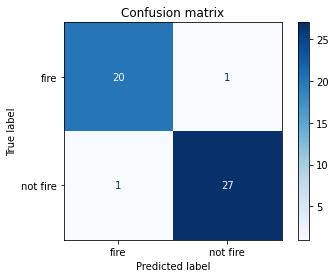

In [47]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, plot_confusion_matrix

LR = LogisticRegression(C=1,penalty='l2',solver='newton-cg')
LR.fit(fire_X_train,fire_y_train)

fire_yhat_test = LR.predict(fire_X_test)
fire_yprob_test = LR.predict_proba(fire_X_test)[:,1]

acc = accuracy_score(fire_y_test,fire_yhat_test)
roc = roc_auc_score(fire_y_test,fire_yprob_test)
f1 = f1_score(fire_y_test,fire_yhat_test)

print('Accuracy: %.6f' % acc)
print('ROC-AUC: %.6f' % roc)
print('F1-score: %.6f' % f1)

class_names = ['fire','not fire']
disp = plot_confusion_matrix(LR,fire_X_test,fire_y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             )
disp.ax_.set_title("Confusion matrix")



plt.show()

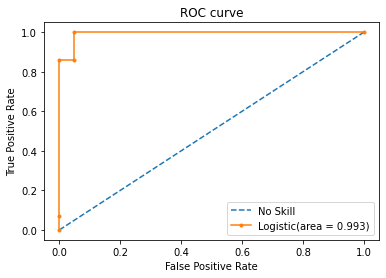

In [48]:
from sklearn.metrics import roc_curve

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(fire_y_test, fire_yprob_test)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic(area = %0.3f)' % roc)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title('ROC curve')
# show the plot
plt.show()

Accuracy: 0.938776
ROC-AUC: 0.991497
F1-score: 0.945455


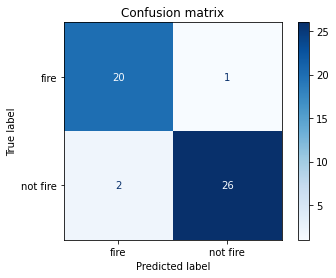

In [49]:
rcc = RandomForestClassifier(max_features='log2',n_estimators=100,random_state=rs)
rcc.fit(fire_X_train,fire_y_train)

fire_yhat_test = rcc.predict(fire_X_test)
fire_yprob_test = rcc.predict_proba(fire_X_test)[:,1]

acc = accuracy_score(fire_y_test,fire_yhat_test)
roc = roc_auc_score(fire_y_test,fire_yprob_test)
f1 = f1_score(fire_y_test,fire_yhat_test)

print('Accuracy: %.6f' % acc)
print('ROC-AUC: %.6f' % roc)
print('F1-score: %.6f' % f1)

class_names = ['fire','not fire']
disp = plot_confusion_matrix(rcc,fire_X_test,fire_y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             )
disp.ax_.set_title("Confusion matrix")

plt.show()

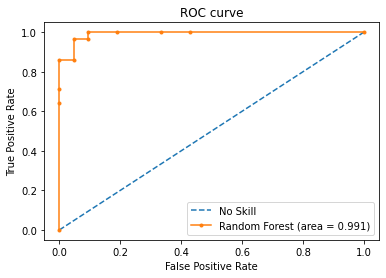

In [50]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(fire_y_test, fire_yprob_test)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Random Forest (area = %0.3f)' % roc)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
# show the legend
plt.legend()
# show the plot
plt.show()

----------------------

## 4. Conclusion

In this notebook, we created a model to classify the instances into fire or not fire in Algerian forests. 

First, we tested some classification models: 

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. k-Nearest Neighbors (KNN)
4. Naive Bayes
5. Classification and Regression Trees (CART)
6. Support Vector Machines (SVM)

In these first tests, the LR and the CART model performed bettet than the others. Beside, we verified that scaling the features had no significant impact in the models' perfomance.

**Therefore, we tested two models with our test set: (i) LogR and (ii) CART. We verified that the models performed similarly. However, the LogR model was slightly better**.